# Problem Statement
Predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle. 

# 1. Import Necessary libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
# SVC_Gaussian = SVC(kernel=’rbf’)
from imblearn.over_sampling import SMOTE

# 2. Import Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Exploratory Data Analysis
## 3.1 Initial Analysis

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [95]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [97]:
print('{}% of the total people have stroke.'.format(round((249/(4861+249))*100,4)))
print('{}% of the total people have not stroke.'.format(round((4861/(4861+249))*100,4)))

4.8728% of the total people have stroke.
95.1272% of the total people have not stroke.


### The data is imbalanced, which is causing the model to give bad performance .

#### Treating Imbalanced data

#### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
* It aims to balance class distribution by randomly increasing minority class examples by replicating them.
* After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [99]:
balanced_data = SMOTE(random_state=0)

X = df.drop(['stroke'],axis=1)
y = df[['stroke']]

X.shape,y.shape #original shape of dataset
 

((5110, 18), (5110, 1))

In [100]:
X_b,y_b = balanced_data.fit_sample(X,y)

X_b.shape,y_b.shape #shape of dataset after treating imbalanced data.

((9722, 18), (9722, 1))

## 3.2 Data Preprocessing

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

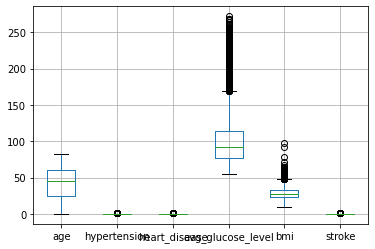

In [11]:
df.boxplot()

<AxesSubplot:>

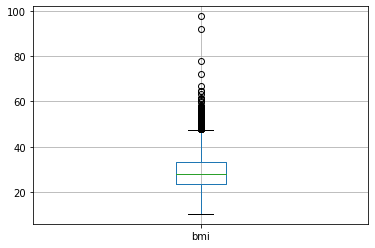

In [12]:
df[['bmi']].boxplot()

In [13]:
100*201/5110

3.9334637964774952

In [46]:
df['bmi'].median(), df['bmi'].mean(), df['bmi'].std()

(28.1, 28.862035225049, 7.699562318787533)

started thinking - 
https://www.neenopal.com/dealing-with-outliers-and-missing-values-in-a-dataset.html

Replacing With Median

Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

You can use ‘fillna’ method for imputing the column ‘Loan_Amount_Term’ with the median value.

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

In [47]:
#Replacing using median
median = df['bmi'].median()
df['bmi'].fillna(median, inplace=True)

In [48]:
df['bmi'].median()

28.1

In [49]:
df['bmi'].isna().sum()

0

<AxesSubplot:>

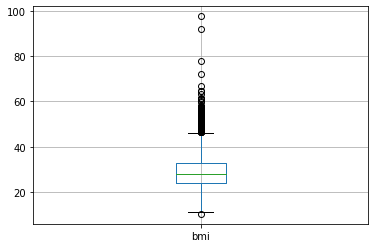

In [50]:
df[['bmi']].boxplot()

In [51]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
# 1. Impact of smoking status on stroke

In [25]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [26]:
df[['stroke','smoking_status']].groupby(by='smoking_status')

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
df.stroke.unique()

array([1, 0], dtype=int64)

In [30]:
df1 = df[df['stroke']==1]

In [32]:
df1[df1['smoking_status']=='smokes'].shape

(42, 11)

In [35]:
df[df['smoking_status']=='never smoked']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [38]:
df.groupby('smoking_status')['stroke'].count()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: stroke, dtype: int64

In [43]:
df.groupby(['stroke','work_type','gender'])[['stroke']].count()

stroke
stroke work_type     gender        
0      Govt_job      Female     376
                     Male       248
       Never_worked  Female      11
                     Male        11
       Private       Female    1678
                     Male      1097
                     Other        1
       Self-employed Female     464
                     Male       290
       children      Female     324
                     Male       361
1      Govt_job      Female      23
                     Male        10
       Private       Female      76
                     Male        73
       Self-employed Female      40
                     Male        25
       children      Female       2

In [53]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [54]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [58]:
cat_var = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_cat = df[cat_var]
for i in df_cat.columns:
    print(i,':',df_cat[i].unique())
    print(i,':',df_cat[i].value_counts())
    print('===============================###===============================')

gender : ['Male' 'Female' 'Other']
gender : Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
===============================###===============================
ever_married : ['Yes' 'No']
ever_married : Yes    3353
No     1757
Name: ever_married, dtype: int64
===============================###===============================
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
work_type : Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
===============================###===============================
Residence_type : ['Urban' 'Rural']
Residence_type : Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
===============================###===============================
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status : never smoked       1892
Unknown            1544
formerly smoked     885
smokes          

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


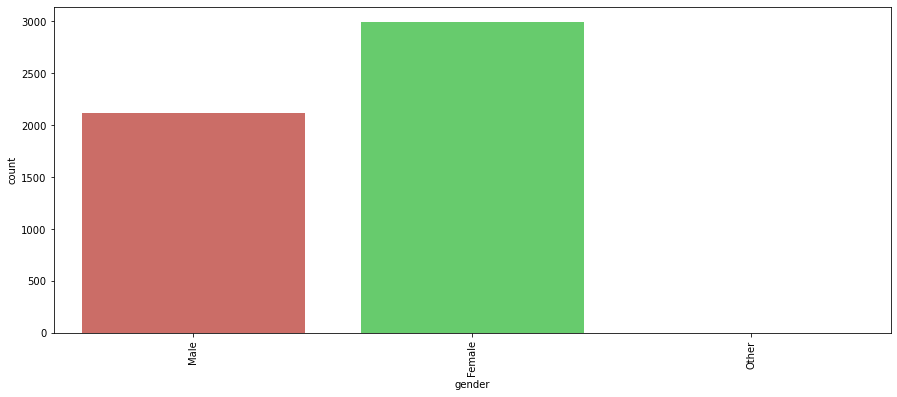

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


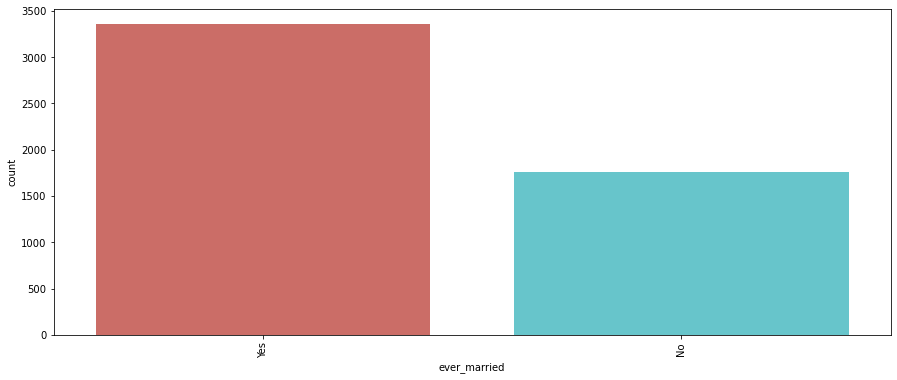

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


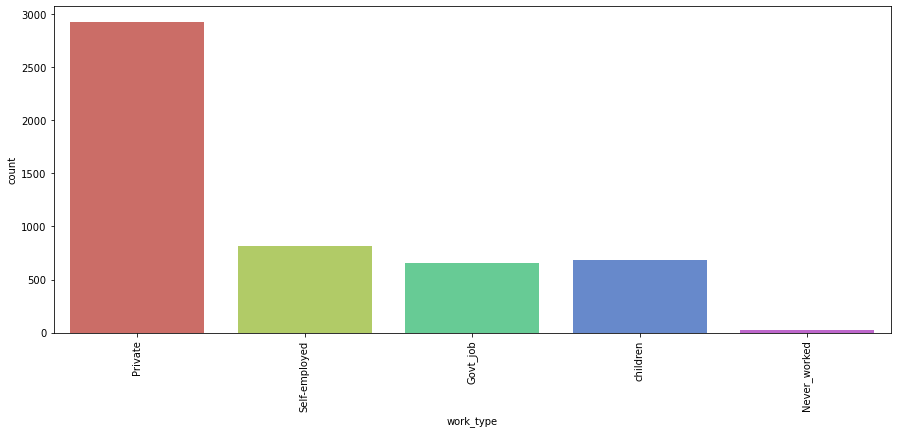

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


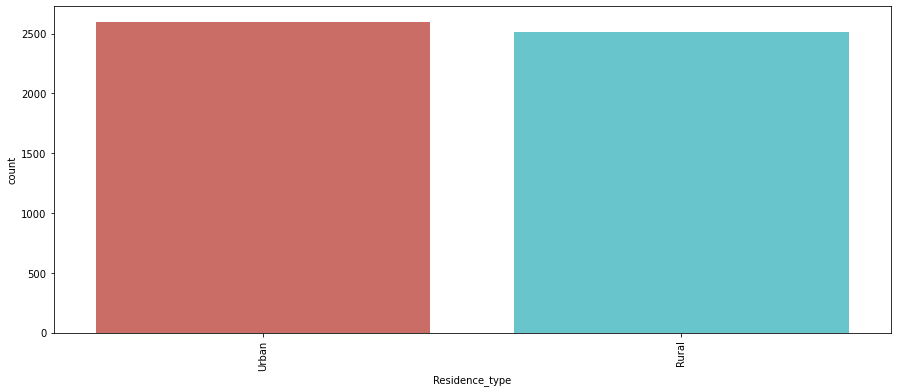

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


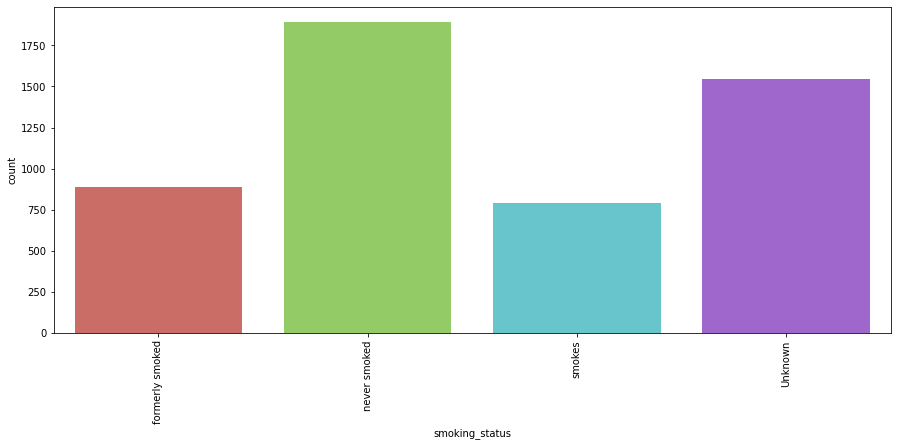

In [62]:
for i in df_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(df_cat[i],data = df_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

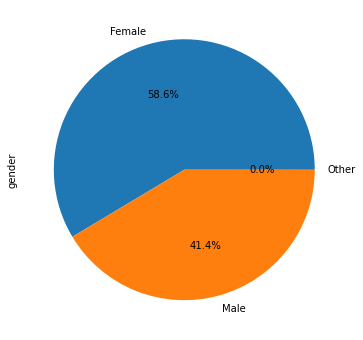

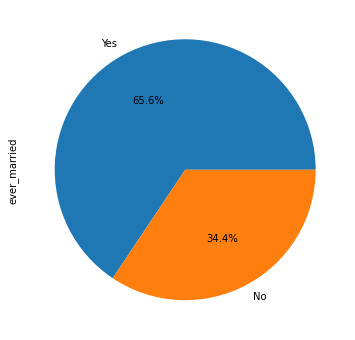

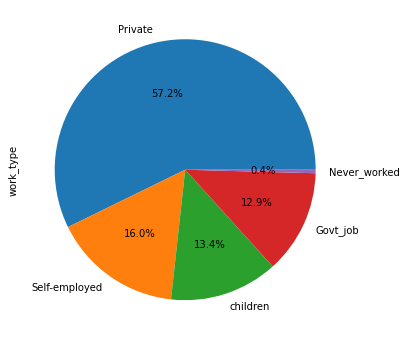

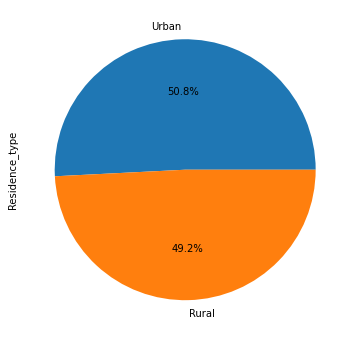

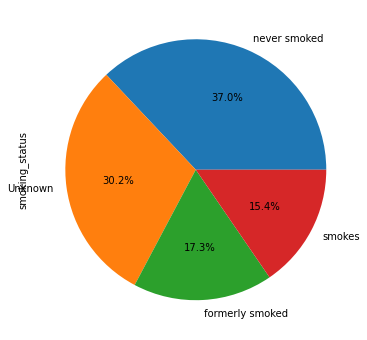

In [65]:
for i in df_cat.columns:
    plt.figure(figsize=(15,6))
    df_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

In [67]:
pip install cufflinks

     -------------------------------------- 81.7/81.7 kB 507.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=af6c26c23d07e8d2988e04647ac8aecc10594154ed668430f249bb2e6d84b1c9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [68]:
import cufflinks as cf

In [69]:
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

In [72]:
gender = df.groupby(df['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels':gender.index,'values':gender.values})
colors = ['lightpink','lightskyblue']
data_gender.iplot(kind='pie',labels='labels',values='values',title='Proportion of stroke among gender',colors=colors)

In [74]:
job = df.groupby(df['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index,
                   'values': job.values
                  })
colors2= ['palegreen','paleturquoise','thistle','moccasin']
data_job.iplot(kind='pie',labels='labels',values='values', title='Work type of people who had stroke', colors = colors2, 
            pull=[0.1, 0.1, 0.1, 0.2])

In [75]:
smoke = df.groupby(df['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels': smoke.index,
                   'values': smoke.values
                  })
data_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02, 0.1, 0.02])

In [76]:
Residence = df.groupby(df['Residence_type'])['stroke'].sum()
data_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })
data_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence area of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [77]:
Married = df.groupby(df['ever_married'])['stroke'].sum()
data_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })
data_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [78]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

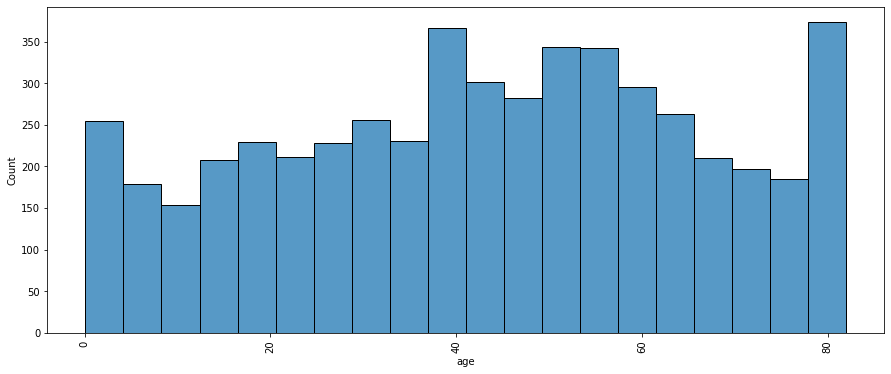

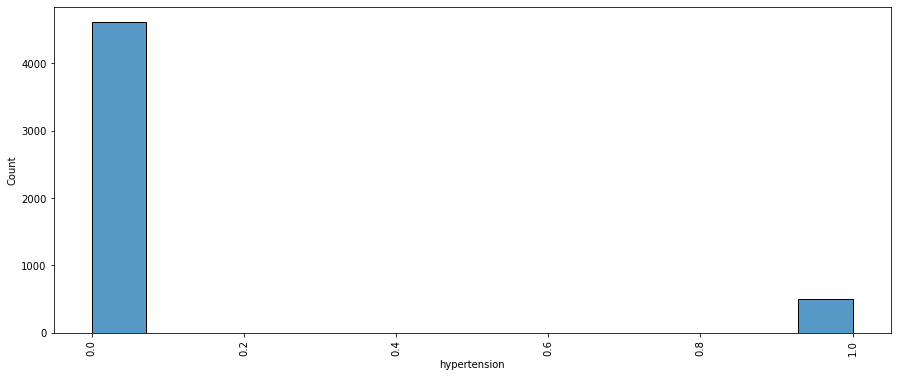

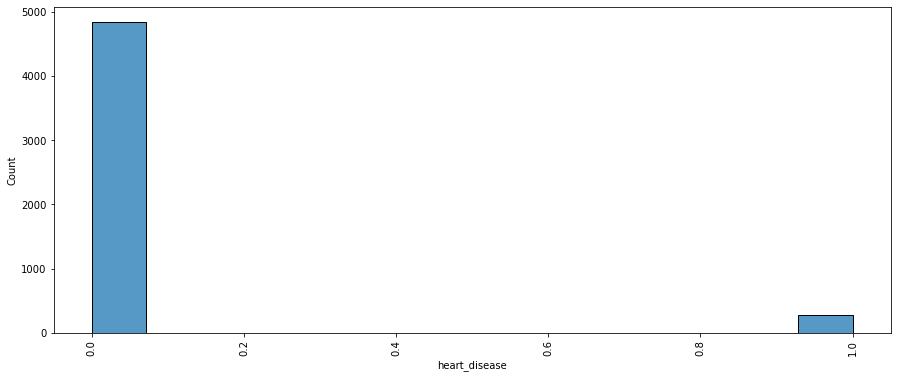

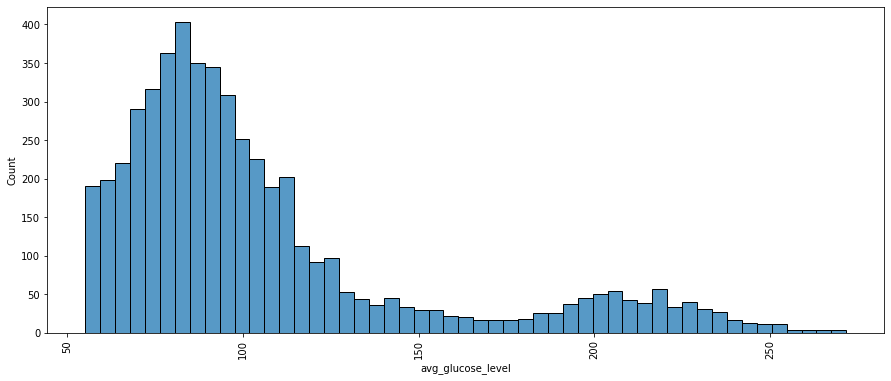

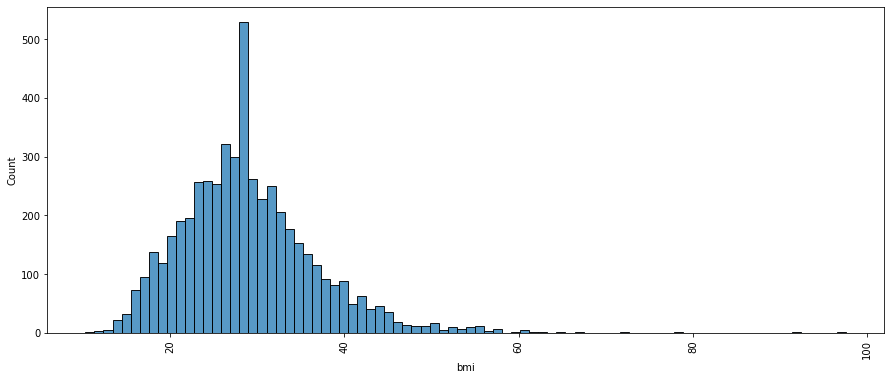

In [79]:
df_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
for i in df_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(df_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [80]:
stroke = df.loc[df['stroke']== 1].reset_index()
stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

In [81]:
df['ever_married'] = [ 0 if i !='Yes' else 1 for i in df['ever_married'] ]
df['gender'] = [0 if i != 'Female' else 1 for i in df['gender']]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
df = pd.get_dummies(df, columns = ['work_type', 'Residence_type','smoking_status'])

In [83]:
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1272,0,22.0,0,0,0,89.53,30.2,0,0,0,1,0,0,0,1,1,0,0,0
5073,1,24.0,0,0,0,90.42,24.3,0,0,0,1,0,0,0,1,0,0,1,0
4353,1,52.0,0,0,1,86.85,23.8,0,0,0,1,0,0,0,1,0,1,0,0
4846,1,34.0,0,0,1,113.26,27.6,0,0,0,1,0,0,0,1,0,0,1,0
985,1,21.0,0,0,1,59.15,22.6,0,0,0,1,0,0,0,1,0,0,1,0
2621,1,60.0,0,0,1,83.16,29.7,0,0,0,1,0,0,1,0,0,0,0,1
3151,1,56.0,0,0,1,112.62,24.8,0,1,0,0,0,0,0,1,0,0,1,0
1433,0,54.0,0,0,1,86.26,35.1,0,0,0,1,0,0,0,1,0,1,0,0
5069,1,21.0,0,0,0,91.01,28.7,0,0,0,1,0,0,0,1,0,0,1,0
952,1,20.0,0,0,0,76.34,20.6,0,0,0,1,0,0,0,1,0,0,0,1


In [85]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [86]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(X_train, y_train)  

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [88]:
X_train.shape, X_test.shape

((3423, 18), (1687, 18))

In [89]:
y_pred= classifier_log.predict(X_test)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1590    1]
 [  96    0]]


In [90]:
print('Training-set accuracy score:', classifier_log.score(X_train, y_train))
print('Test-set accuracy score:', classifier_log.score(X_test, y_test))

Training-set accuracy score: 0.9553023663453112
Test-set accuracy score: 0.942501481920569


In [91]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(X_train, y_train)
y_pred= classifier_dt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1581   10]
 [  94    2]]


In [92]:
print('Training-set accuracy score:', classifier_dt.score(X_train, y_train))
print('Training-set accuracy score:', classifier_dt.score(X_test, y_test))

Training-set accuracy score: 0.9593923458954133
Training-set accuracy score: 0.9383521043272081


In [93]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train) 
y_pred= classifier_rf.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1588    3]
 [  96    0]]


In [94]:
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9894829097283085
Training-set accuracy score: 0.941315945465323


In [ ]:
# https://www.kaggle.com/code/nirmalgaud/brain-stroke-prediction-using-machine-learning/notebook

In [101]:
Xb_train, Xb_test,yb_train,yb_test = train_test_split(X_b,y_b,test_size=0.20,random_state=10)

In [102]:
classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(Xb_train, yb_train)  

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [103]:
Xb_train.shape, Xb_test.shape 

((7777, 18), (1945, 18))

In [104]:
y_pred= classifier_log.predict(Xb_test)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(yb_test,y_pred)
print(cm)

[[963  35]
 [ 93 854]]


In [105]:
print('Training-set accuracy score:', classifier_log.score(Xb_train, yb_train))
print('Test-set accuracy score:', classifier_log.score(Xb_test, yb_test))

Training-set accuracy score: 0.936993699369937
Test-set accuracy score: 0.9341902313624678


In [107]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(Xb_train, yb_train)
y_pred= classifier_dt.predict(Xb_test)
cm= confusion_matrix(yb_test,y_pred)
print(cm)

[[841 157]
 [140 807]]


In [108]:
print('Training-set accuracy score:', classifier_dt.score(Xb_train, yb_train))
print('Training-set accuracy score:', classifier_dt.score(Xb_test, yb_test))

Training-set accuracy score: 0.8546997556898547
Training-set accuracy score: 0.8473007712082262


In [110]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(Xb_train, yb_train) 
y_pred= classifier_rf.predict(Xb_test)
cm= confusion_matrix(yb_test,y_pred)         
print(cm)

C:\Users\HP\AppData\Local\Temp/ipykernel_16732/246610137.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[987  11]
 [ 49 898]]


In [111]:
print('Training-set accuracy score:', classifier_rf.score(Xb_train, yb_train))
print('Training-set accuracy score:', classifier_rf.score(Xb_test, yb_test))

Training-set accuracy score: 0.9978140671209978
Training-set accuracy score: 0.9691516709511568
